In [1]:
import pandas as pd

NC_houseDF = pd.read_csv("Data Source/NC_data.csv")
NC_houseDF.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
0,2024-12-01,2024-12-31,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174.0,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
1,2023-02-01,2023-02-28,Charlotte,North Carolina,560000.0,399900.0,286.298569,225.218023,3.0,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
2,2024-07-01,2024-07-31,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204.0,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
3,2021-03-01,2021-03-31,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272.0,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
4,2024-03-01,2024-03-31,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136.0,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


## Cleaning the dataset

In [2]:
#coy the df
NC_houseDF1 = NC_houseDF.copy()

In [3]:
# convert the data and create year month key 
NC_houseDF1['period_begin'] = pd.to_datetime(NC_houseDF1['period_begin'])

In [4]:
#Creating year_month column 
NC_houseDF1['year_month'] = NC_houseDF1['period_begin'].dt.to_period('M')

In [5]:
# gettomg the importnat columns for the analysis 
NC_df = NC_houseDF1[[
    'year_month',
    'city',
    'state',
    'median_sale_price',
    'median_list_price',
    'median_ppsf',
    'median_list_ppsf',
    'homes_sold',
    'new_listings',
    'inventory',
    'months_of_supply',
    'median_dom',
    'avg_sale_to_list',
    'sold_above_list',
    'off_market_in_two_weeks',
    'population'
]]

In [8]:
# Group the data based on city and year_month to perfrom aggrigation that fall into each pair
monthly = (
    NC_df.groupby(['city','year_month'])
    .agg({
        'median_sale_price': 'mean',
        'median_list_price': 'mean',
        'median_ppsf': 'mean',
        'median_list_ppsf': 'mean',
        'homes_sold': 'sum',
        'new_listings': 'sum',
        'inventory': 'mean',
        'months_of_supply': 'mean',
        'median_dom': 'mean',
        'avg_sale_to_list': 'mean',
        'sold_above_list': 'mean',
        'off_market_in_two_weeks': 'mean',
        'population': 'max'
    })
    .reset_index()
)

In [15]:
NC_df.head()

,year_month,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
0,2024-12,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174.0,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
1,2023-02,Charlotte,North Carolina,560000.0,399900.0,286.298569,225.218023,3.0,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
2,2024-07,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204.0,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
3,2021-03,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272.0,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
4,2024-03,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136.0,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [17]:
NC_df.to_csv("Data_Source/Monthly_housing_data", index=False)

In [19]:
# read the saved file 
NC_df1 =pd.read_csv('Data_Source/Monthly_housing_data')

## Analyzing the housing market in NC cities

### Top 5 most expesive housing Market Cities in North Carolina since 2020

In [22]:
# Convert the date to Period prepering for time series analysis
NC_df1['year_month'] = pd.PeriodIndex(NC_df1['year_month'], freq='M')
# Extract the year 
NC_df1['year'] = NC_df1['year_month'].dt.year

In [24]:
# Filtering the data for time based analysis starting from 2020
NC_2020 = NC_df1[NC_df1['year'] >= 2020]

#### North Carolina’s Most Expensive Cities, towns, Communities, and Neighborhoods (2020–2024)

In [53]:
# Find the top expansive cities by grouping the cities and using the median sale prices 
# setting population size to idenftify all cities 
NC_Cities = NC_2020[NC_2020['population'] >= 10000]
top5cities = (
    NC_Cities.groupby('city')['median_sale_price']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .head(5)
)

In [54]:
top5_df = top5cities.reset_index()
top5_df.columns = ['city', 'median_sale_price']
top5_df

,city,median_sale_price
0,Weddington,923746.93
1,Summerfield,533920.87
2,Davidson,517469.73
3,Apex,492899.82
4,Myrtle Grove,486526.90


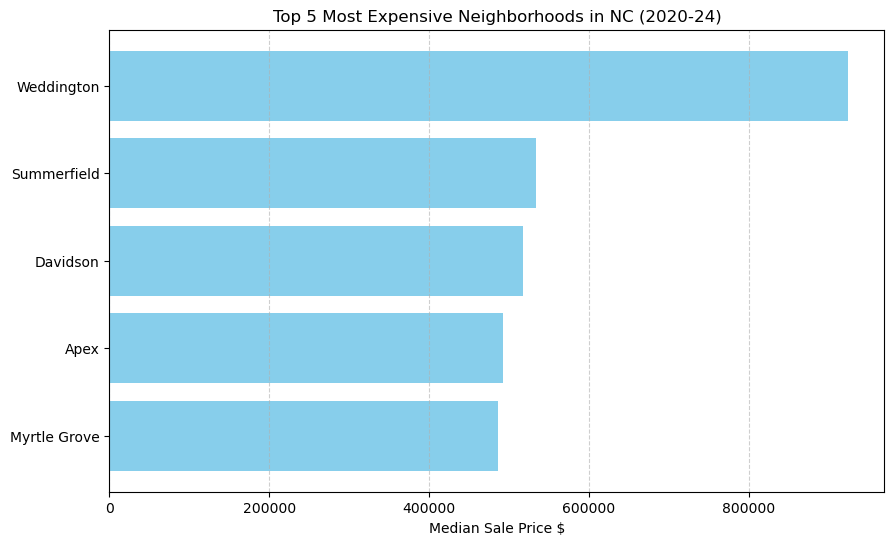

In [55]:
# Using horzontal bar to show the most expensive neighborhoods in NC
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top5_df['city'], top5_df['median_sale_price'], color='skyblue')
plt.title('Top 5 Most Expensive Neighborhoods in NC (2020-24)')
plt.xlabel('Median Sale Price $')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Top 5 most expesive housing Market Major Cities in North Carolina since 2020

In [63]:
# Find the top expansive cities by grouping the cities and using the median sale prices 
# setting population size 
NC_Cities = NC_2020[NC_2020['population'] >= 200000]
top5cities = (
    NC_Cities.groupby('city')[['median_sale_price','population']]
    .mean()
    .round(2)
    .sort_values(by='median_sale_price', ascending=False)
    .head(5)
)

In [64]:
top5major_df = top5cities.reset_index()
top5major_df.columns = ['city', 'median_sale_price', 'population']
top5major_df

,city,median_sale_price,population
0,Asheville,407162.88,295040.0
1,Raleigh,378280.03,1150010.0
2,Charlotte,360174.86,1436613.0
3,Wilmington,344386.54,275128.0
4,Durham,337427.01,411362.0


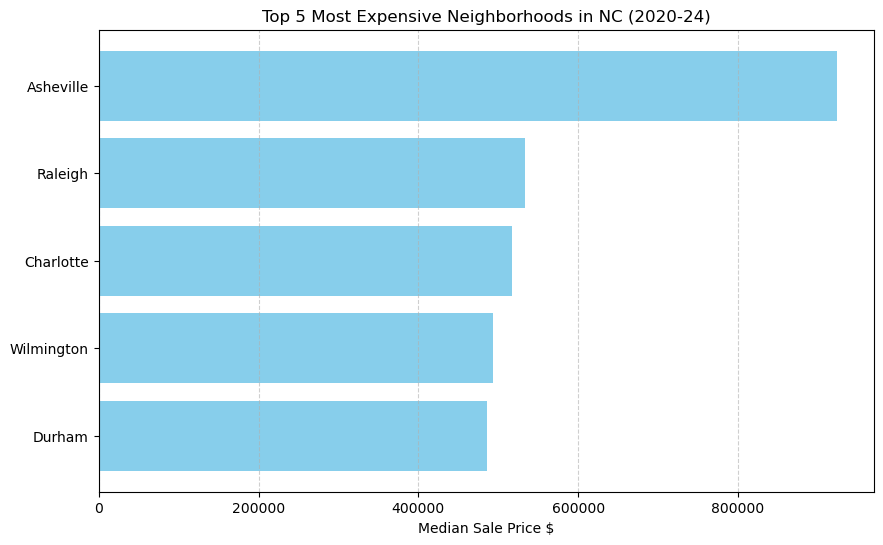

In [65]:
# Using horzontal bar to show the most expensive cities in NC
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top5major_df['city'], top5_df['median_sale_price'], color='skyblue')
plt.title('Top 5 Most Expensive Neighborhoods in NC (2020-24)')
plt.xlabel('Median Sale Price $')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()